In [127]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
def display_images(images, cmap=None):
    fig = plt.figure(figsize=(16, 16))
    for i in range(1, len(images) + 1):
        fig.add_subplot(4, 4, i)
        plt.imshow(images[i - 1], cmap=cmap)
        
        
    
def draw_contours(thresholds, images):
    images_copy = [image.copy() for image in images]
    contours_l = [cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)[1] for thresh in thresholds]
    
    for i in range(len(contours_l)):
        cv2.drawContours(images_copy[i], contours_l[i], -1, (0, 255, 0), 3)
    display_images(images_copy) 

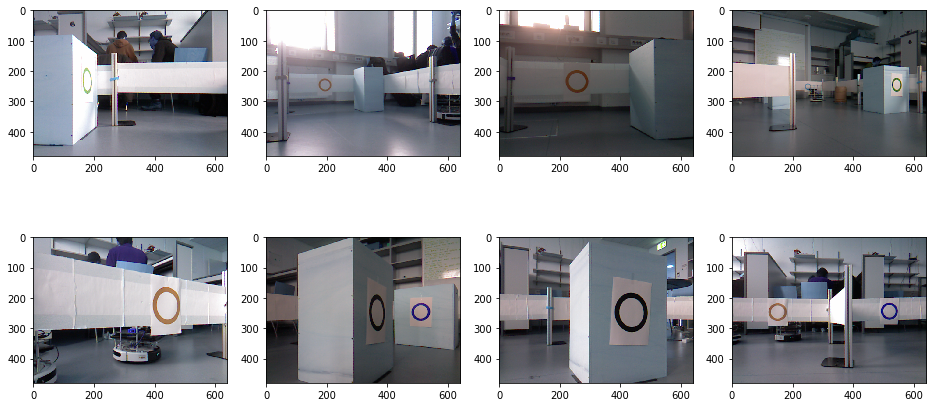

In [129]:
images = [cv2.imread('../images/img-1.png'),
          cv2.imread('../images/img-6.png'),
          cv2.imread('../images/img-10.png'),
          cv2.imread('../images/img-12.png'),
          cv2.imread('../images/img-14.png'),
          cv2.imread('../images/img-38.png'),
          cv2.imread('../images/img-46.png'),
          cv2.imread('../images/img-58.png')]

display_images(images)

In [130]:
## GRAYSCALE

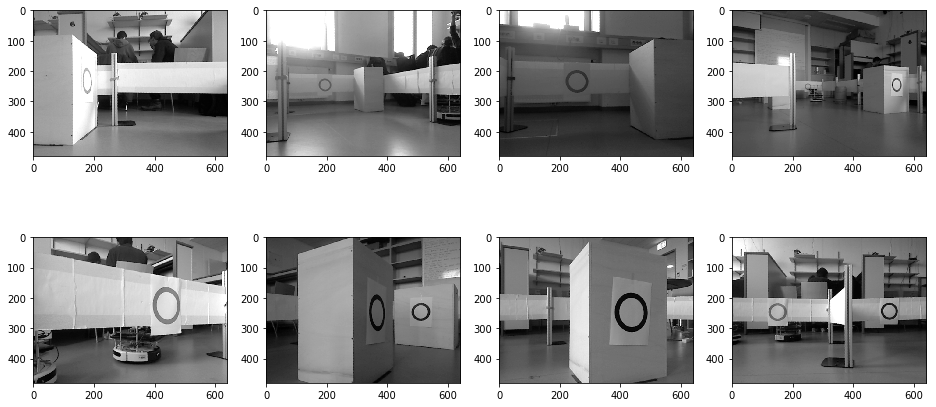

In [131]:
gray_images = [cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in images]
display_images(gray_images, cmap="gray")

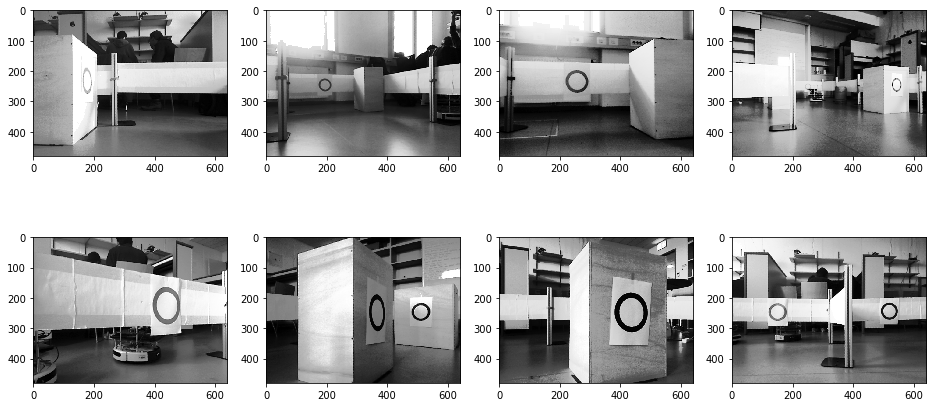

In [132]:
hist_images = [cv2.equalizeHist(gray) for gray in gray_images]
display_images(hist_images, cmap="gray")

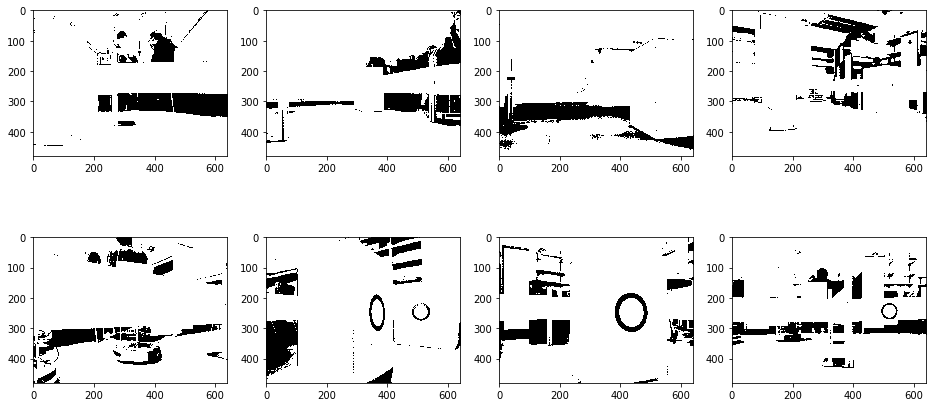

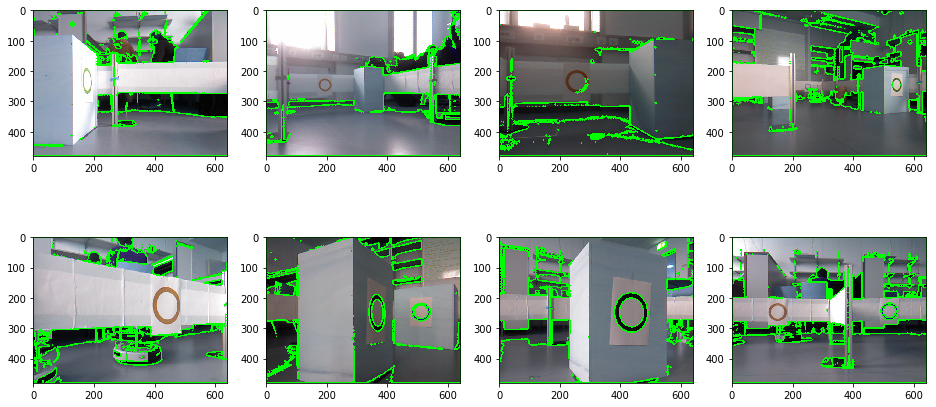

In [133]:
# Binarize the image
thresholds = [cv2.threshold(hist, 30, 255, cv2.THRESH_BINARY)[1] for hist in hist_images]
display_images(thresholds, cmap="gray")

draw_contours(thresholds, images)

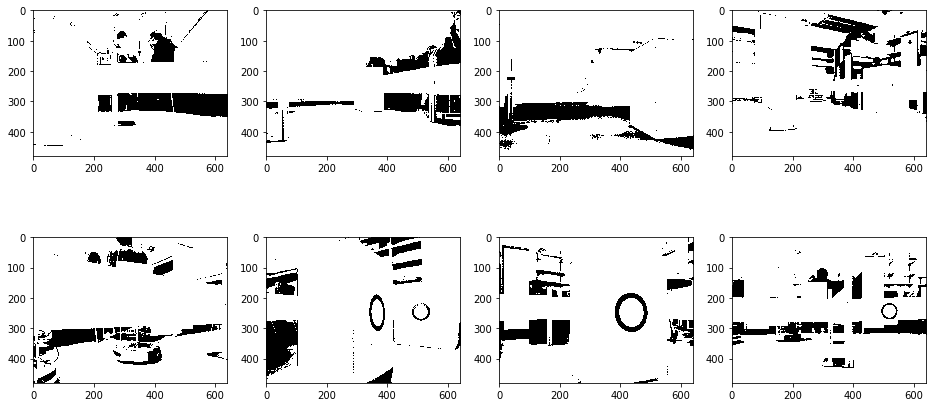

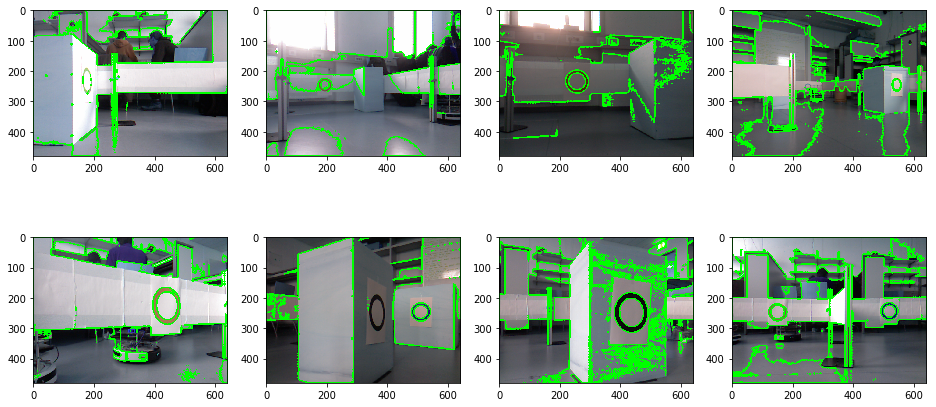

In [134]:
# Binarize the image
thresholds_otsu = [cv2.threshold(hist, 30, 255, cv2.THRESH_OTSU)[1] for hist in hist_images]
display_images(thresholds, cmap="gray")

draw_contours(thresholds_otsu, images)

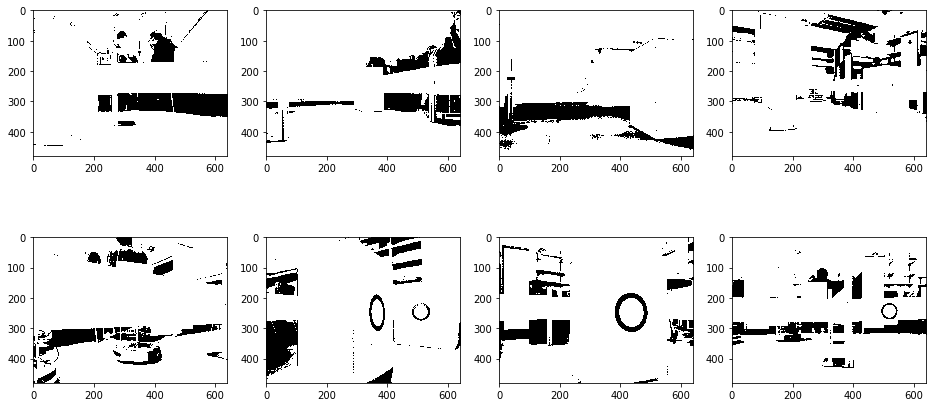

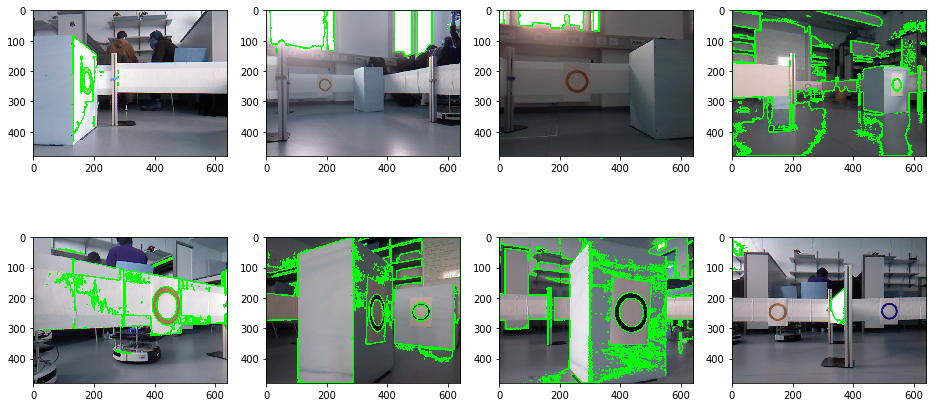

In [135]:
# Binarize the image
thresholds_triangle = [cv2.threshold(hist, 30, 255, cv2.THRESH_TRIANGLE)[1] for hist in hist_images]
display_images(thresholds, cmap="gray")

draw_contours(thresholds_triangle, images)

In [24]:
elps = []
for cnt in contours:
    if cnt.shape[0] >= 20:
        ellipse = cv2.fitEllipse(cnt)
        elps.append(ellipse)
        


In [25]:
candidates = []
for n in range(len(elps)):
    for m in range(n + 1, len(elps)):
        e1 = elps[n]
        e2 = elps[m]
        dist = np.sqrt(((e1[0][0] - e2[0][0]) ** 2 + (e1[0][1] - e2[0][1]) ** 2))
        #print(dist)
        if dist < 10:
            candidates.append((e1,e2))

In [26]:
for c in candidates:

    e1 = c[0]
    e2 = c[1]

    cv2.ellipse(img, e1, (0, 255, 0), 2)
    cv2.ellipse(img, e2, (0, 255, 0), 2)

    size = (e1[1][0]+e1[1][1])/2
    center = (e1[0][1], e1[0][0])

    x1 = int(center[0] - size / 2)
    x2 = int(center[0] + size / 2)
    x_min = x1 if x1>0 else 0
    x_max = x2 if x2<img.shape[0] else img.shape[0]

    y1 = int(center[1] - size / 2)
    y2 = int(center[1] + size / 2)
    y_min = y1 if y1 > 0 else 0
    y_max = y2 if y2 < img.shape[1] else img.shape[1]


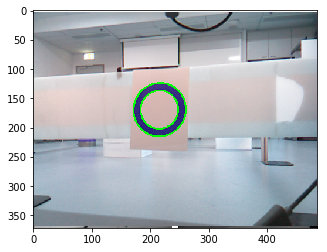

In [27]:
plt.imshow(img)

In [77]:
circles = cv2.HoughCircles(hist, cv2.HOUGH_GRADIENT, 1.2, 150, minRadius=40, maxRadius=120)
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")

    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
        # draw the circle in the output image, then draw a rectangle
        # corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (255, 0, 0), 4, cv2.LINE_AA)
        cv2.circle(output, (x, y), 2, (255, 0, 255), 3, cv2.LINE_AA)
     
    # show the output image
    plt.imshow(np.hstack([img, output]))


NameError: name 'hist' is not defined